In [2]:
from app.allocation import *
import matplotlib.pyplot as plt
from app.alloc_metric import *
from pprint import pprint
from collections import defaultdict 
import time
import json
import math

In [3]:
def showPopularity(pref):
    projectStudentMap = defaultdict(int)
    for _, l in pref.items():
        for p,_ in l:
            projectStudentMap[p] += 1
    return projectStudentMap

def staffPopularity(pref, projStaff):
    projectMap = showPopularity(studentPreferences)
    out = defaultdict(int)
    for k, v in projectMap.items():
        out[projStaff[k]] += v
    return out

def getStaffLoading(projStaff):
    out = defaultdict(int)
    for p, s in projStaff.items():
        out[s]+=1
    return out


def showLoad(alloc, StaffProjMap, ax=None, name=None, title='Loading For Each Supervisor'):
    ax = ax or plt.gca()
    loadMap = getLoadMap(StaffProjMap, alloc)
    ax.bar([str(a) for a in loadMap.keys()], loadMap.values())
    ax.set_title(title)
    return ax

def showRank(alloc, studentPreferences, ax=None, name=None, title='Number of Students For Each Rank'):
    ax = ax or plt.gca()
    rankMap = getStudentRankMap(alloc, studentPreferences)
    ax.hist(rankMap.values())
    ax.set_title(title)
    return ax

def getMetricList(stats, bot=None, top=None):
    new_stats = defaultdict(dict)
    for load, stat in stats.items():
        if top and int(load) > top: continue
        if bot and int(load) < bot: continue
        for metric, val in stat.items():
            new_stats[metric][load] = val

    for metric, val in new_stats.items():
        sort_dict= dict(sorted(val.items(), key=lambda item: int(item[0])))
        new_stats[metric] = {int(a):float(b) for a,b in sort_dict.items()}
    return new_stats

def plotAllMetric(new_stats):
    fig, axes = plt.subplots(len(new_stats), 1, figsize=(10, 20), sharey='row')
    for i, ((metric, l)) in enumerate(new_stats.items()):
        axes[i].plot(list(l.keys()), list(l.values()), label='Depth')
        axes[i].set_ylabel(metric)
    axes[0].set_title('Metrics Against Number of Run with Depth = 5 and Loading Constraint = 4')
    fig.tight_layout()


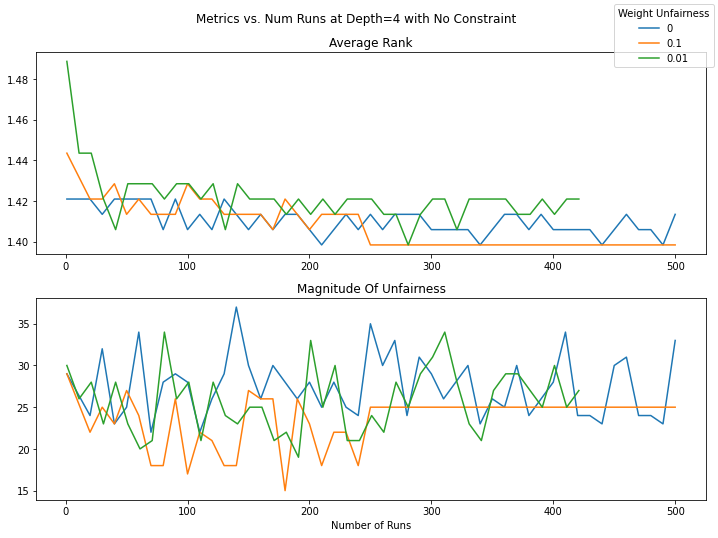

In [4]:
# a_file = open("/mnt/c/Users/Ramon/Documents/Codes/FYP/App/allocation/evaluations/results/stats_depth5_rank5", "r")
# stat_rank = json.load(a_file)
# # cleanStatRank = getMetricList(stat_rank)
# a_file = open("./evaluations/results/l20d4unfair0_stats", "r")
# stat_a = json.load(a_file)
# d_file = open("./evaluations/results/l20d5r10u1_stats", "r")
# stat_d = json.load(d_file)

# b_file = open("./evaluations/results/l20d5r10u0.1_stats", "r")
# stat_b = json.load(b_file)


# c_file = open("./evaluations/results/l20d5r10u0.01_stats", "r")
# stat_c = json.load(c_file)

a_file = open("./evaluations/results/l20d4r10unfair0.newRealZeroClean_stats", "r")
stat_a = json.load(a_file)


b_file = open("./evaluations/results/l20d4r10unfair0.1newRealZero_stats", "r")
stat_b = json.load(b_file)


c_file = open("./evaluations/results/l20d4r10unfair0.01newRealZero_stats", "r")
stat_c = json.load(c_file)

for x in [str(i) for i in range(2, 11)]:
    stat_a.pop(x, 0)
    stat_b.pop(x, 0)
    stat_c.pop(x, 0)

cleanStat_a = getMetricList(stat_a)
cleanStat_b = getMetricList(stat_b)
cleanStat_c = getMetricList(stat_c)
# cleanStat_d = getMetricList(stat_d)

fig,axes = plt.subplots(2, figsize=(10,7.5))
plt.suptitle('Metrics vs. Num Runs at Depth=4 with No Constraint')

axes[0].plot(cleanStat_a['AvgRank'].keys(), cleanStat_a['AvgRank'].values(), label='0')
# axes[0].plot(cleanStat_d['AvgRank'].keys(), cleanStat_d['AvgRank'].values(), label='1')
axes[0].plot(cleanStat_b['AvgRank'].keys(), cleanStat_b['AvgRank'].values(), label='0.1')
axes[0].plot(cleanStat_c['AvgRank'].keys(), cleanStat_c['AvgRank'].values(), label='0.01')
axes[0].title.set_text('Average Rank')

axes[1].plot(cleanStat_a['NoUnfair'].keys(), cleanStat_a['NoUnfair'].values())
# axes[1].plot(cleanStat_d['NoUnfair'].keys(), cleanStat_d['NoUnfair'].values())
axes[1].plot(cleanStat_b['NoUnfair'].keys(), cleanStat_b['NoUnfair'].values())
axes[1].plot(cleanStat_c['NoUnfair'].keys(), cleanStat_c['NoUnfair'].values())
axes[1].title.set_text('Magnitude Of Unfairness')
plt.xlabel('Number of Runs')
plt.tight_layout()
fig.legend(title='Weight Unfairness')
plt.savefig('unfairRankdepth=4.pdf')


[0.011175155639648438, 0.2737405300140381, 0.8294963836669922, 3.2710039615631104, 4.268702507019043, 15.867139101028442, 69.92190885543823]


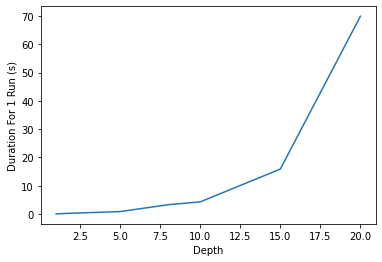

In [16]:
# a_file = open("/mnt/c/Users/Ramon/Documents/Codes/FYP/App/allocation/evaluations/results/stats_depth5_rank5", "r")
# stat_rank = json.load(a_file)
# cleanStatRank = getMetricList(stat_rank)
d1_file = open("evaluations/results/d1_stats", "r")
d2_file = open("evaluations/results/d2_stats", "r")
d5_file = open("evaluations/results/d5_stats", "r")
d8_file = open("evaluations/results/d8_stats", "r")
d10_file = open("evaluations/results/d10_stats", "r")
d15_file = open("evaluations/results/d15_stats", "r")
d20_file = open("evaluations/results/d20_stats", "r")
stat_d1 = json.load(d1_file)
stat_d2 = json.load(d2_file)
stat_d5 = json.load(d5_file)
stat_d8 = json.load(d8_file)
stat_d10 = json.load(d10_file)
stat_d15 = json.load(d15_file)
stat_d20 = json.load(d20_file)

# for x in [str(i) for i in range(2, 11)]:
#     stat_d15.pop(x, 0)

# cleanStat_d1 = getMetricList(stat_d1, 200)
# cleanStat_d2 = getMetricList(stat_d2, 200)
# cleanStat_d5 = getMetricList(stat_d5, 200)
# cleanStat_d8 = getMetricList(stat_d8, 200)
# cleanStat_d10 = getMetricList(stat_d10, 200)
# cleanStat_d15 = getMetricList(stat_d15, 200)
# cleanStat_d20 = getMetricList(stat_d20, 200)
# print(stat_d1)
stats = [stat_d1, stat_d2,stat_d5,stat_d8,stat_d10,stat_d15,stat_d20]
# plotAllMetric()
durations = [a['1']['Duration'] for a in stats]
print(durations)
fig, ax = plt.subplots(1)
ax.plot([1,2,5,8,10,15,20], durations)
ax.set_xlabel('Depth')
ax.set_ylabel('Duration For 1 Run (s)')
# fig.tight_layout()
fig.savefig('durationDepth.pdf')


In [ ]:
all_stats = [cleanStat_d20, cleanStat_d15, cleanStat_d10, cleanStat_d8, cleanStat_d5]
names = ['20','15','10','8', '5']
print()
fig, axs = plt.subplots(1, figsize=(15,3))
for stat, name in zip(all_stats, names):
    d = stat['Duration']
    l = stat['AvgRank']
    axs.plot([d[k] for k in list(l.keys())], list(l.values()), label=name)
        # plt.set_ylabel(metric)
plt.suptitle('Avg Rank vs. Time Taken for each Depth')
axs.set_ylabel('Avg Rank')
axs.set_xlabel('Time Taken (s)')
axs.legend(title='Depth')

In [ ]:
steepest_file = open("evaluations/steep_stats", "r")
random_file = open("evaluations/random_stats", "r")
stat_r = json.load(steepest_file)
stat_s = json.load(random_file)
steepest = getMetricList(stat_r, 290)
random = getMetricList(stat_s, 290)
all_stats = [steepest, random]
names = ['steepest','random']
fig, axs = plt.subplots(2)
for stat, name in zip(all_stats, names):
    axs[0].plot(stat['AvgRank'].keys(), list(stat['AvgRank'].values()), label=name)
    axs[1].plot(stat['Duration'].keys(), list(stat['Duration'].values()), label=name)

        # plt.set_ylabel(metric)
plt.suptitle('Avg Rank vs. Time Taken for each Depth')
# axs.set_ylabel('Avg Rank')
# axs.set_xlabel('Time Taken (s)')
fig.legend(title='Depth')
# plt.savefig('DepthRun.pdf')

In [ ]:
import csv
studentPref = "/mnt/c/Users/Ramon/Documents/Codes/FYP/backend/sample_data/prefs.csv"
ProjectInfo =  "/mnt/c/Users/Ramon/Documents/Codes/FYP/backend/sample_data/proj.csv"

with open(studentPref, mode="r", encoding="utf-8-sig") as infile:
    inputDict = csv.DictReader(infile)
    studentPreferences = createStudentPrefMap(inputDict)
with open(ProjectInfo, mode="r", encoding="utf-8-sig") as infile:
    inputDict = csv.DictReader(infile)
    StaffProjMap = createProjStaffMap(inputDict)
config = Config(defaultLoad = 10, maxDepth = 3)
studentProjectList = {
    student: [proj for proj, _ in projList]
    for student, projList in studentPreferences.items()
}
costMap = getCostMap(studentPreferences)
print(StaffProjMap)

studentPref
ProjectInfo
with open(studentPref) as pref_f:
    studentPreferencesJson = json.load(pref_f)
    studentPreferences2 = {int(k): v for k, v in studentPreferencesJson.items()}
with open(ProjectInfo) as proj_f:
    StaffProjMapJson = json.load(proj_f)
    StaffProjMap2 = {int(k): v for k, v in StaffProjMapJson.items()}



In [ ]:


a_file = open("./evaluations/results/rank_results", "r")
a_statfile = open("./evaluations/results/rank_stats", "r")
results_a = json.load(a_file)
stat = json.load(a_statfile)
stats_a = {}
for id,r in results_a.items():
    r_int = {int(a):b for a,b in r.items()}
    stats_a[id] = getStat(r_int, costMap, StaffProjMap)
cleanStat_a = getMetricList(stats_a)
cleanStat_sad = getMetricList(stat)
cleanStat_a['Duration'] = cleanStat_sad['Duration']
# b_file = open("./evaluations/results/MocklessRank_results", "r")
# results_b = json.load(b_file)
# stats_b = {}
# for id,r in results_b.items():
#     r_int = {int(a):b for a,b in r.items()}
#     stats_b[id] = getStat(r_int, costMap, StaffProjMap)
# cleanStat_b = getMetricList(stats_b)


# cleanStat_b = getMetricList(stat_b)

c_file = open("./evaluations/results/rankMock6d12l20_stats", "r")
stat_c = json.load(c_file)
cleanStat_c = getMetricList(stat_c)

files = [cleanStat_a,cleanStat_c]

metrics = ['MaxRank' ,'VarianceRank', 'AvgRankNoUnalloc', 'AveUnfair','NoUnalloc','Duration']
names = ['Max Rank' ,'Rank Variance ', 'Average Rank', 'Average Unfairness','No. of Unalloc. Student','Duration']
fig, axes = plt.subplots(len(metrics),len(files),figsize=(5*len(files),2*len(metrics)))
for j,f in enumerate(files):
   
    for i, (m,n) in enumerate(zip(metrics,names)):
        axes[i][0].set_ylabel(n)
        axes[i][j].plot(f[m].keys(), f[m].values())
        axes[i][j].grid(True)
plt.suptitle('Metric of Allocation vs. Required Maximum Rank')
axes[0][0].set_title('MSc 2020 Dataset')
axes[0][1].set_title('Generated Dataset 1')
# axes[0][2].set_title('Generated Dataset 2 (Given Rank = 5)')
fig.tight_layout()
plt.savefig('rankNoUnalloc.pdf')

In [ ]:
a_file = open("./evaluations/results/load_stats", "r")
stat_a = json.load(a_file)
cleanStat_a = getMetricList(stat_a)
b_file = open("./evaluations/results/loadMock_stats", "r")
stat_b = json.load(b_file)
cleanStat_b = getMetricList(stat_b )

c_file = open("./evaluations/results/rankMock6d12l20_stats", "r")
stat_c = json.load(c_file)
cleanStat_c = getMetricList(stat_c)

files = [cleanStat_a, cleanStat_b]

metrics = ['MaxLoad', 'VarLoad' , 'AvgRank', 'AvgRankNoUnalloc','AveUnfair', 'NoUnalloc', 'Duration']
fig, axes = plt.subplots(len(metrics),len(files),figsize=(5*len(files),2*len(metrics)))
for j,f in enumerate(files):
    for i, m in enumerate(metrics):
        axes[i][0].set_ylabel(m)
        axes[i][j].plot(f[m].keys(), f[m].values())
        axes[i][j].grid(True)
        axes[i][j].axvline(x=3, color='r', alpha=0.3, label='Min Capacity')
plt.suptitle('Metric of Allocation vs. Required Default Loading')
axes[0][0].set_title('MSc 2020 Dataset')
axes[0][1].set_title('Generated Dataset 1')

legend_without_duplicate_labels(fig)
fig.tight_layout()
plt.savefig('load.pdf')


In [ ]:
def legend_without_duplicate_labels(fig):
    handles, labels = plt.gca().get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    fig.legend(*zip(*unique))


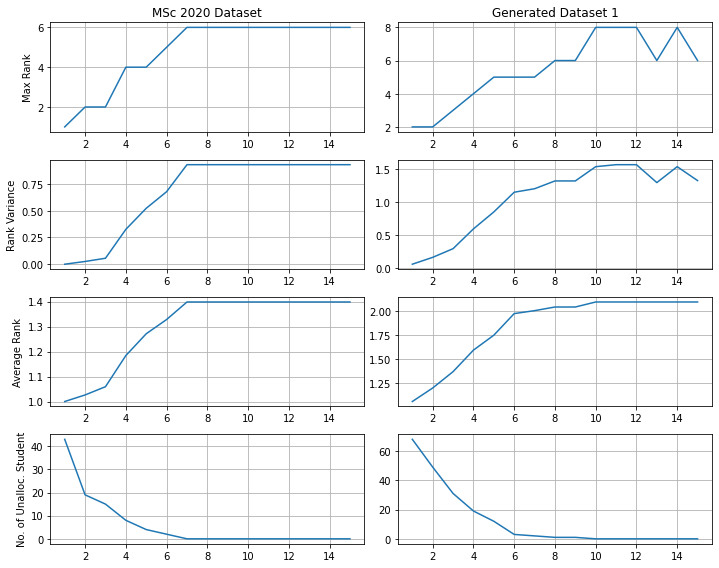

In [22]:
a_file = open("./evaluations/results/costUnallocr12l20_stats", "r")
stat_a = json.load(a_file)
cleanStat_a = getMetricList(stat_a,top=15)
b_file = open("./evaluations/results/costUnallocMockr12l20_stats", "r")
stat_b = json.load(b_file)
cleanStat_b = getMetricList(stat_b,top=15)

c_file = open("./evaluations/results/rankMock6d12l20_stats", "r")
stat_c = json.load(c_file)
cleanStat_c = getMetricList(stat_c)

files = [cleanStat_a, cleanStat_b]

metrics = ['MaxRank','VarianceRank','AvgRankNoUnalloc' , 'NoUnalloc']
names = ['Max Rank','Rank Variance','Average Rank' , 'No. of Unalloc. Student']
# metrics = cleanStat_a.keys()
fig, axes = plt.subplots(len(metrics),len(files),figsize=(5*len(files),2*len(metrics)))
for j,f in enumerate(files):
    for i, (m,n) in enumerate(zip(metrics, names)):
        axes[i][0].set_ylabel(n)
        axes[i][j].grid(True)
        axes[i][j].plot( f[m].keys(), f[m].values())
        # axes[i][0].set_xscale('log')
# plt.suptitle('Metric of Allocation vs. Required Default Loading')
axes[0][0].set_title('MSc 2020 Dataset')
axes[0][1].set_title('Generated Dataset 1')
fig.tight_layout()
fig.savefig('costUnallocConstant.pdf')

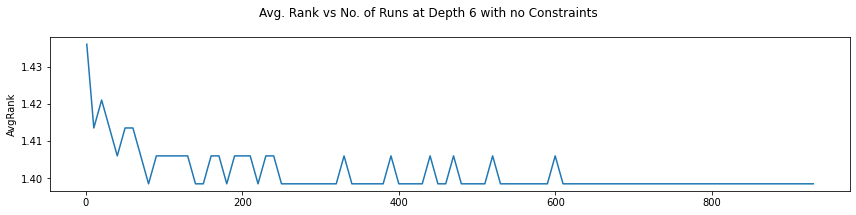

In [23]:

a_file = open("/mnt/c/Users/Ramon/Documents/Codes/FYP/App/allocation/evaluations/results/d6noCon_stats", "r")
stat_a = json.load(a_file)
cleanStat_a = getMetricList(stat_a)
# b_file = open("./evaluations/results/rankMock2_stats", "r")
# stat_b = json.load(b_file)
# cleanStat_b = getMetricList(stat_b )

# c_file = open("./evaluations/results/rankMock5_stats", "r")
# stat_c = json.load(c_file)
# cleanStat_c = getMetricList(stat_c )
files = [cleanStat_a]
metrics = ['AvgRank']
fig, axes = plt.subplots(len(metrics),len(files),figsize=(12,3*len(metrics)))
for j,f in enumerate(files):
    for i, m in enumerate(metrics):
        axes.set_ylabel(m)
        axes.plot(f[m].keys(), f[m].values())
plt.suptitle('Avg. Rank vs No. of Runs at Depth 6 with no Constraints')
fig.tight_layout()
fig.savefig('d6noCon.pdf')



In [ ]:
cleanStat_a['AvgRank']

In [40]:
stat_pop = defaultdict(dict,
    {'MaxRank': {0: 5.0,
              9: 5.0,
              6: 5.0,
              12: 5.0,
              39: 5.0,
              62: 5.0,
              139: 5.0},
             'MedianRank': {0: 1.0,
              6: 1.0,
              12: 1.0,
              39: 1.0,
              41: 1.0,
              62: 1.0,
              139: 1.0},
             'AvgRank': {0: 1.5413533834586466,
              6: 1.5413533834586466,
              12: 1.5413533834586466,
              39: 1.4962406015037595,
              41: 1.5112781954887218,
              62: 1.4887218045112782,
              139: 1.4887218045112782},
             'AvgRankNoUnalloc': {0: 1.5413533834586466,
              6: 1.5413533834586466,
              12: 1.5413533834586466,
              39: 1.4962406015037595,
              41: 1.5112781954887218,
              62: 1.4887218045112782,
              139: 1.4887218045112782},
             'VarianceRank': {0: 1.1505455367742665,
              6: 1.1505455367742665,
              12: 1.1505455367742665,
              39: 1.0920911300808411,
              41: 1.1070156594493752,
              62: 1.0919780654644131,
              139: 1.0769404714794506},
             'MaxLoad': {0: 5.0,
              6: 5.0,
              12: 5.0,
              39: 5.0,
              41: 5.0,
              62: 5.0,
              139: 5.0},
             'MedianLoad': {0: 3.0,
              6: 3.0,
              12: 3.0,
              39: 3.0,
              41: 3.0,
              62: 3.0,
              139: 3.0},
             'VarLoad': {0: 2.2058298631766804,
              6: 2.2058298631766804,
              12: 2.2058298631766804,
              39: 2.2058298631766804,
              41: 2.1570493753718023,
              62: 2.2546103509815585,
              139: 2.2546103509815585},
             'NoUnfair': {0: 29.0,
              6: 28.0,
              12: 28.0,
              39: 28.0,
              41: 32.0,
              62: 26.0,
              139: 26.0},
             'MagUnfair': {0: 45.0,
              6: 43.0,
              12: 43.0,
              39: 43.0,
              41: 49.0,
              62: 40.0,
              139: 39.0},
             'AveUnfair': {0: 0.3383458646616541,
              6: 0.3233082706766917,
              12: 0.3233082706766917,
              39: 0.3233082706766917,
              41: 0.3684210526315789,
              62: 0.3007518796992481,
              139: 0.2932330827067669},
             'NoUnalloc': {0: 0.0,
              6: 0.0,
              12: 0.0,
              39: 0.0,
              41: 0.0,
              62: 0.0,
              139: 0.0}})

In [70]:

X = np.arange(len(Equal))
ax = plt.subplot(111)
ax.bar(X, Equal.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, accuracy_post.values(), width=0.2, color='g', align='center')
ax.legend(('Pre Accuracy','Post Accuracy'))
plt.xticks(X, accuracy_pre.keys())
plt.title("Accuracy score", fontsize=17)
plt.show()

In [ ]:

unEqual = {
    # 'MaxRank': 5,
#  'MedianRank': 1,
#  'AvgRank': 1.7218045112781954,
 'Avg Rank': 1.7218045112781954,
 'Rank Var': 1.4940358414834078,
#  'MaxLoad': 5,
#  'MedianLoad': 3.0,
 'VarLoad': 2.2953514739229024,
#  'NoUnfair': 44,
#  'MagUnfair': 79,
 'Avg Unfair': 0.5939849624060151,
 'NoUnalloc': 0
 }

Equal = {
    # 'MaxRank': 5,
#  'MedianRank': 1,
#  'AvgRank': 1.5413533834586466,
 'Avg Rank': 1.5413533834586466,
 'Rank Var': 1.1505455367742665,
#  'MaxLoad': 5,
#  'MedianLoad': 3,
 'Load Var': 2.2058298631766804,
#  'NoUnfair': 29,
#  'MagUnfair': 45,
 'Avg Unfair': 0.3383458646616541,
 'NoUnalloc': 0
 }

In [76]:
s_unfair = {'AveUnfair': [0.3233082706766917,0.3383458646616541,0.3233082706766917,0.3233082706766917],  'AvgRank':[1.5413533834586466,  1.5413533834586466,
1.5413533834586466, 1.5413533834586466]}



s = {'AveUnfair': [0.3458646616541353, 0.3458646616541353,0.3609022556390977,0.3609022556390977],  'AvgRank':[1.5413533834586466,  1.5413533834586466,
1.5413533834586466, 1.5413533834586466]}


[0.0, 0.0]


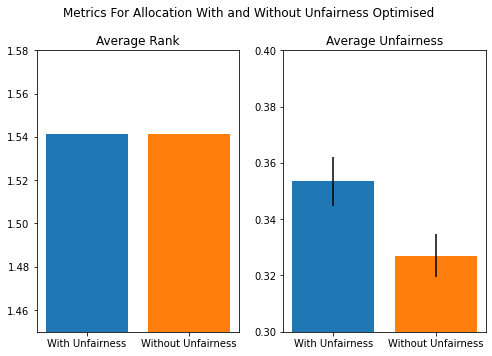

In [102]:

fig, ax = plt.subplots(1,2, figsize=(7,5))
means = [mean(s['AvgRank']), mean(s_unfair['AvgRank'])]
std = [stat.stdev(s['AvgRank']), stat.stdev(s_unfair['AvgRank'])]

means_unfair = [mean(s['AveUnfair']), mean(s_unfair['AveUnfair'])]
std_unfair = [stat.stdev(s['AveUnfair']), stat.stdev(s_unfair['AveUnfair'])]
print(std)
positions = [1,2]
ax[0].bar(positions, means, yerr=std, color=['tab:blue','tab:orange'], tick_label=['With Unfairness', 'Without Unfairness'])
ax[1].bar(positions, means_unfair, yerr=std_unfair,color=['tab:blue','tab:orange'], tick_label=['With Unfairness', 'Without Unfairness'])
ax[0].set_ylim((1.45,1.58))
ax[1].set_ylim((0.3,0.4))
ax[0].set_title('Average Rank')
ax[1].set_title('Average Unfairness')
fig.suptitle('Metrics For Allocation With and Without Unfairness Optimised')
fig.tight_layout()
fig.savefig('unfairness.pdf')

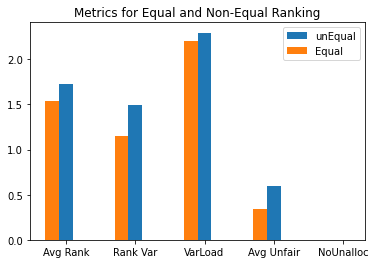

In [72]:

X = np.arange(len(unEqual))
ax = plt.subplot(111)
ax.bar(X, unEqual.values(), width=0.2, align='center')
ax.bar(X-0.2, Equal.values(), width=0.2, align='center')
ax.legend(('unEqual','Equal'))
plt.xticks(X, unEqual.keys())
plt.title("Metrics for Equal and Non-Equal Ranking")
plt.savefig('Equal_metric.pdf')

In [ ]:
def showRank(alloc, studentPreferences, ax=None, name=None, title='Number of Students For Each Rank'):
    ax = ax or plt.gca()
    rankMap = getStudentRankMap(alloc, studentPreferences)
    ax.hist(rankMap.values())
    ax.set_title(title)
    return ax



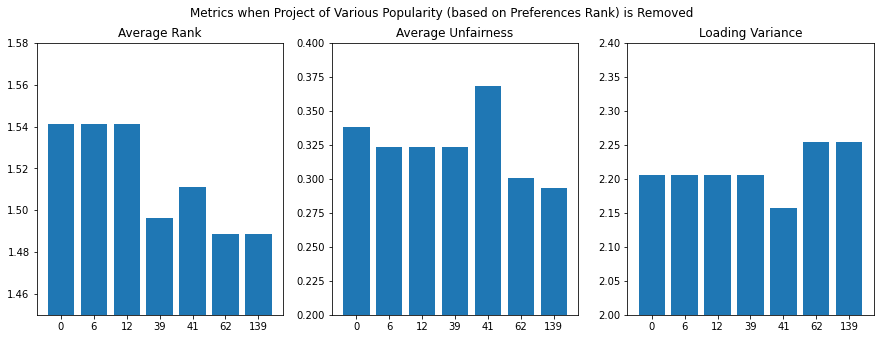

In [41]:
# plotAllMetric(stat_pop)

labels = [str(i) for i in stat_pop['AvgRankNoUnalloc'].keys()]
metrics = ['AvgRankNoUnalloc', 'AveUnfair','VarLoad']
names = ['Average Rank', 'Average Unfairness','Loading Variance']

fig, ax = plt.subplots(1,len(metrics), figsize=(15,5))
for i, (m,n) in enumerate(zip(metrics, names)):
    rects1 = ax[i].bar(labels, stat_pop[m].values(), label=m) 
    ax[i].set_title(n)
# rects2 = ax.bar(x + width/2, women_means, width, label='Women')
fig.suptitle("Metrics when Project of Various Popularity (based on Preferences Rank) is Removed")
ax[0].set_ylim((1.45,1.58))
ax[1].set_ylim((0.2,0.4))
ax[2].set_ylim((2,2.4))
fig.savefig('popularity.pdf')